#OPDRACHT
Datasets te vinden op: https://ourworldindata.org/

Opdracht: Formuleer een antwoord op de volgende vraag in je rapport.

- Welke niet-fossiele energietechnologie zal in de toekomst de beste prijs hebben?

- Beste, toekomstige prijs voor niet-fossiele energie:

Om prijzen te kunnen voorspellen, moet u waarschijnlijk lineaire regressie gebruiken over de verschillende niet-fossiele brandstofopties.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Consumptie

In [ ]:
#Renewable energy
url = 'https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv'
df_energy = pd.read_csv(url)

#en codebook
url = 'https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-codebook.csv'
df_energy_codebook = pd.read_csv(url)
df_energy_codebook

,column,description,source
0,country,Geographic location,Our World in Data
1,year,Year of observation,Our World in Data
2,iso_code,ISO 3166-1 alpha-3 three-letter country codes,International Organization for Standardization
3,population,Population,Calculated by Our World in Data based on diffe...
4,gdp,"Total real gross domestic product, inflation-a...",Maddison Project Database
...,...,...,...
124,wind_elec_per_capita,"Per capita electricity generation from wind, m...",Calculated by Our World in Data based on BP St...
125,wind_electricity,"Electricity generation from wind, measured in ...",Calculated by Our World in Data based on BP St...
126,wind_energy_per_capita,Per capita primary energy consumption from win...,Calculated by Our World in Data based on BP St...
127,wind_share_elec,Share of electricity generation that comes fro...,Calculated by Our World in Data based on BP St...


In [ ]:
#Levelized costs of energy
url = 'https://raw.githubusercontent.com/MBonnes/LocalGitDAP/main/CO2%20Emissions/levelized-cost-of-energy.csv'
df_energy_costs = pd.read_csv(url)

In [ ]:
df_energy.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)

In [ ]:
#benodigde kolommen selecteren
final_table_columns = ['country','year','population', 'gdp','biofuel_cons_change_pct','biofuel_consumption','biofuel_share_energy',
                                                             'hydro_cons_change_pct','hydro_consumption','hydro_share_energy',
                                                              'nuclear_cons_change_pct','nuclear_consumption','nuclear_share_energy',
                                                              'solar_cons_change_pct','solar_consumption','solar_share_energy',
                                                              'wind_cons_change_pct','wind_consumption','wind_share_energy']
df_energy = df_energy[df_energy.columns.intersection(final_table_columns)]

In [ ]:
df_energy[~df_energy['solar_consumption'].isna()].loc[:,'solar_consumption']

193         0.000
194         0.000
195         0.000
196         0.000
197         0.000
           ...   
21507    1185.515
21508    1524.550
21509    1855.592
21510    2222.443
21511    2701.722
Name: solar_consumption, Length: 5442, dtype: float64

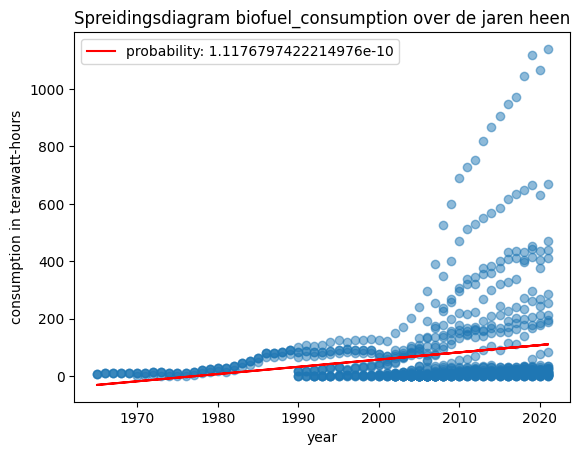

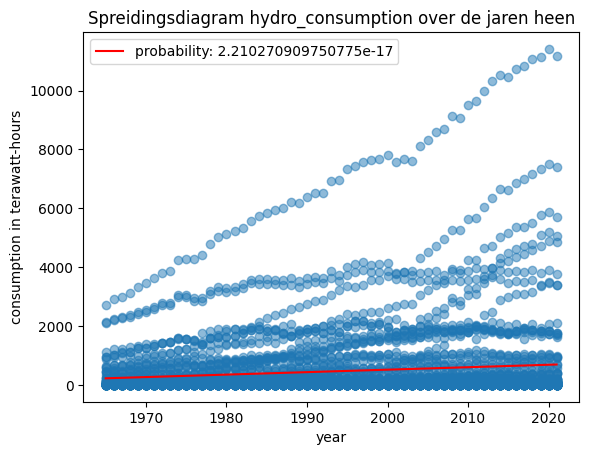

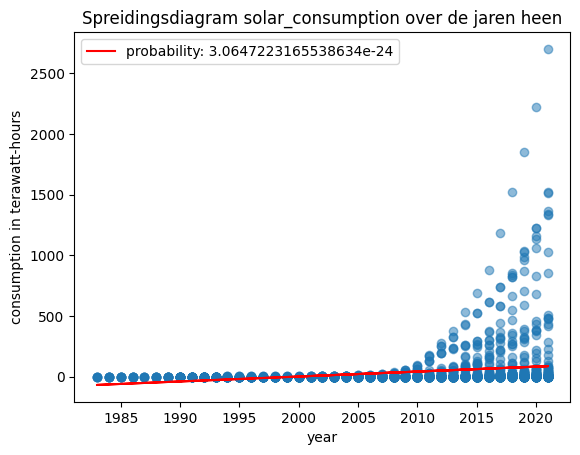

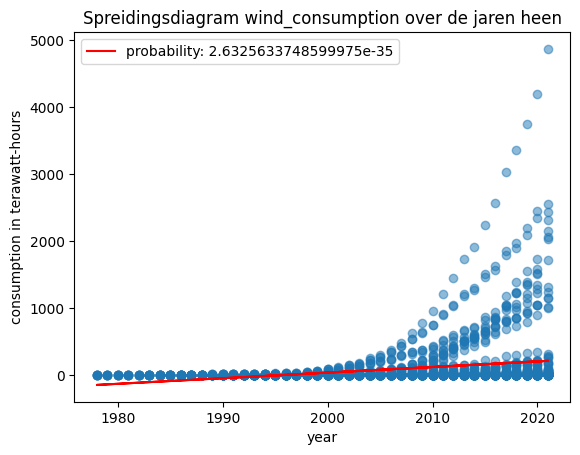

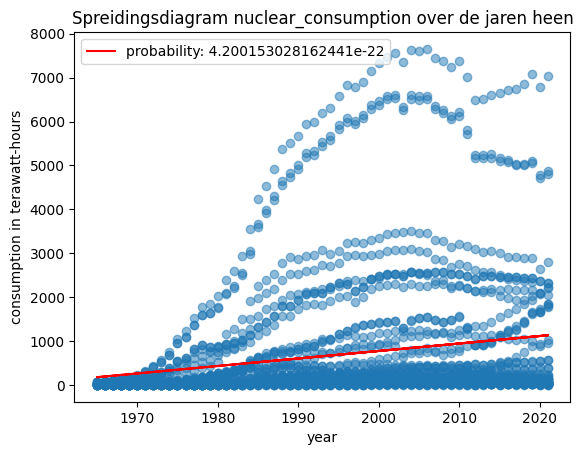

In [ ]:
#we kijken naar de consumptie waarden per jaar voor elke energiebron
from scipy import stats
bronnen = ['biofuel_consumption', 'hydro_consumption', 'solar_consumption', 'wind_consumption', 'nuclear_consumption']

#Scatter chart
for bron in bronnen:
  temp = df_energy[~df_energy[bron].isna()]
  temp = temp[~(temp[bron]==0)]
  fig, ax = plt.subplots()
  x = temp['year']
  y = temp[bron]
  ax.set_xlabel('year')
  ax.set_ylabel("consumption in terawatt-hours")
  ax.set_title('Spreidingsdiagram ' + bron + ' over de jaren heen')
  plt.scatter(x, y, alpha=0.5)

  slope, intercept, r, p, std_err = stats.linregress(x, y)
  def myfunc(x):
    return slope * x + intercept
  mymodel = list(map(myfunc, x))

  plt.plot(x, mymodel, c='r', label = 'probability: ' + str(p))
  plt.legend()

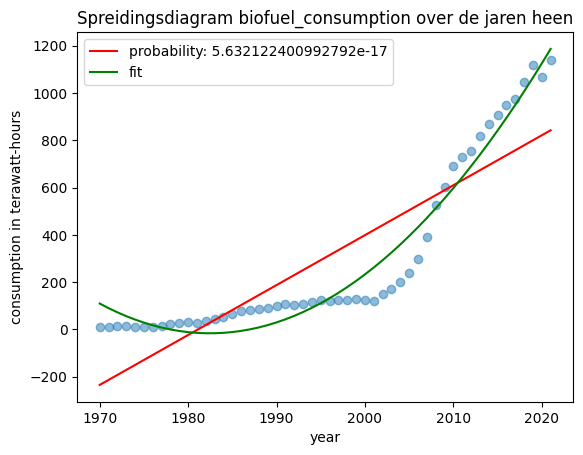

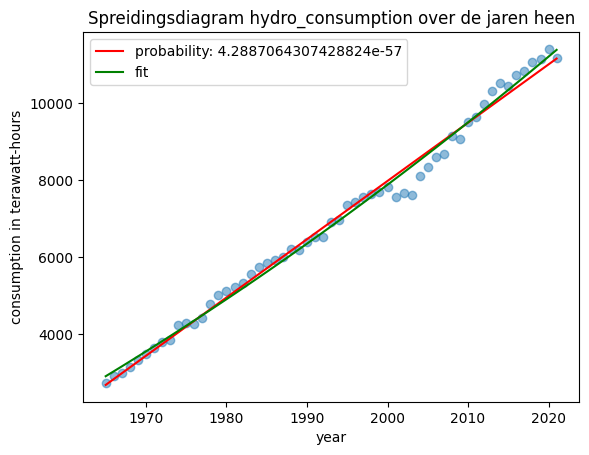

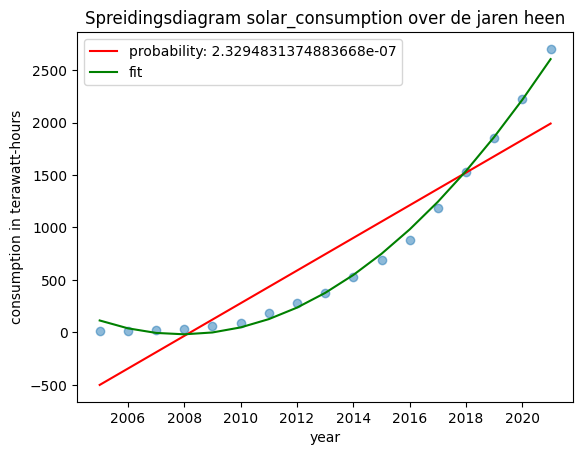

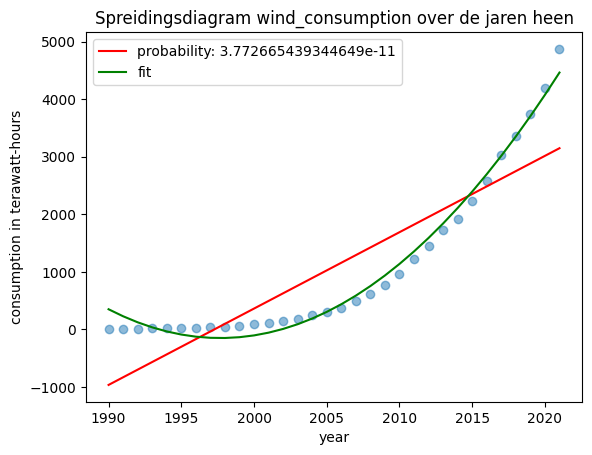

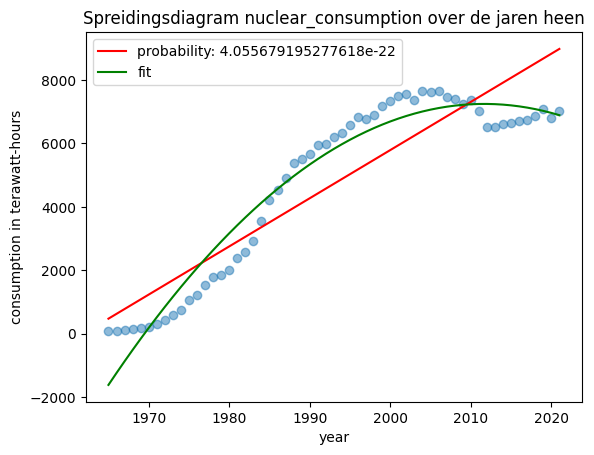

In [ ]:
#we zien wel trends in de grafieken, maar met alle landen door elkaar is het wat onoverzichtelijk
#we kijken naar de consumptie waarden per jaar voor elke energiebron met de 'World' waarde voor country
from scipy import stats
from scipy import optimize
bronnen = ['biofuel_consumption', 'hydro_consumption', 'solar_consumption', 'wind_consumption', 'nuclear_consumption']

#Scatter chart
for bron in bronnen:
  temp = df_energy[~df_energy[bron].isna()]
  temp = temp[~(temp[bron] < 10)]
  temp = temp[temp['country'] == 'World']
  fig, ax = plt.subplots()
  x = temp['year']
  y = temp[bron]
  ax.set_xlabel('year')
  ax.set_ylabel("consumption in terawatt-hours")
  ax.set_title('Spreidingsdiagram ' + bron + ' over de jaren heen')
  plt.scatter(x, y, alpha=0.5)

  #we tekenen een lineaire regressielijn
  slope, intercept, r, p, std_err = stats.linregress(x, y)
  def myfunc(x):
    return slope * x + intercept
  mymodel = list(map(myfunc, x))
  plt.plot(x, mymodel, c='r', label = 'probability: ' + str(p))
  plt.legend()

  #en een kwadratisch verband
  def parabola(x, a, b, c):
    return a*x**2 + b*x + c
  fit_params, pcov = optimize.curve_fit(parabola, x, y)  
  y_fit = parabola(x, *fit_params)
  plt.plot(x, y_fit, label='fit', color = 'green')
  plt.legend()

<ipython-input-55-623ac756cc2d>:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_extend = x.append(pd.Series([2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2035,2040,2045,2050]))
<ipython-input-55-623ac756cc2d>:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_extend = x.append(pd.Series([2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2035,2040,2045,2050]))
<ipython-input-55-623ac756cc2d>:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_extend = x.append(pd.Series([2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2035,2040,2045,2050]))
<ipython-input-55-623ac756cc2d>:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  

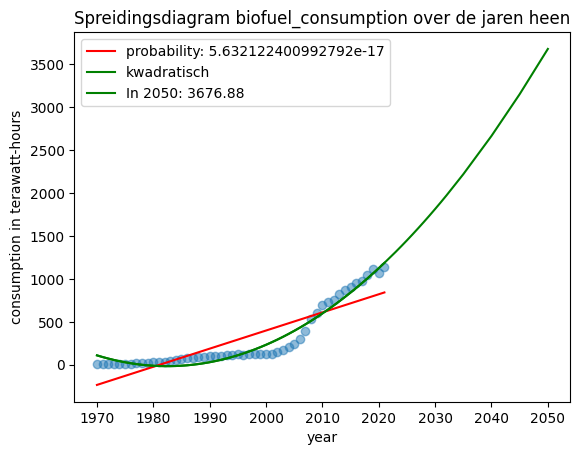

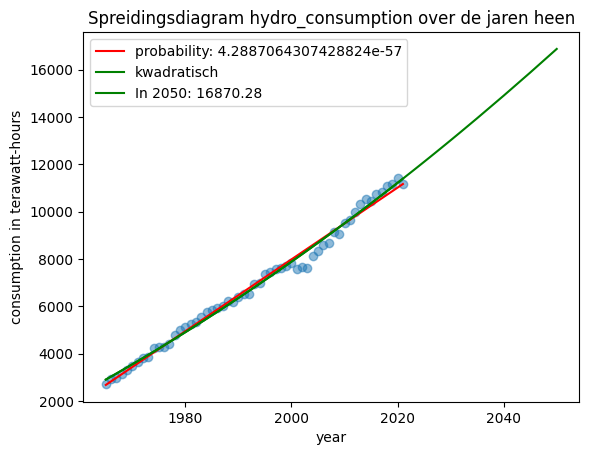

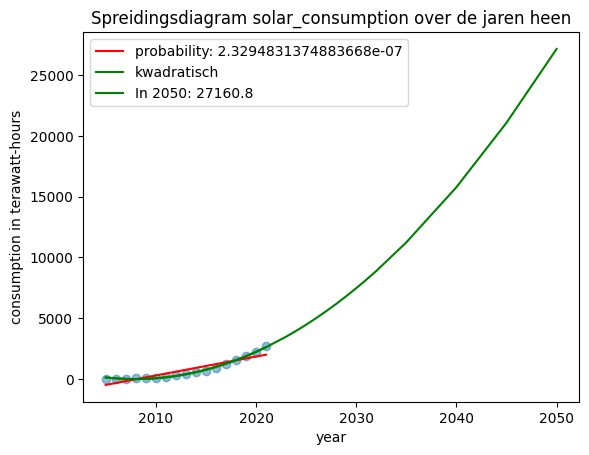

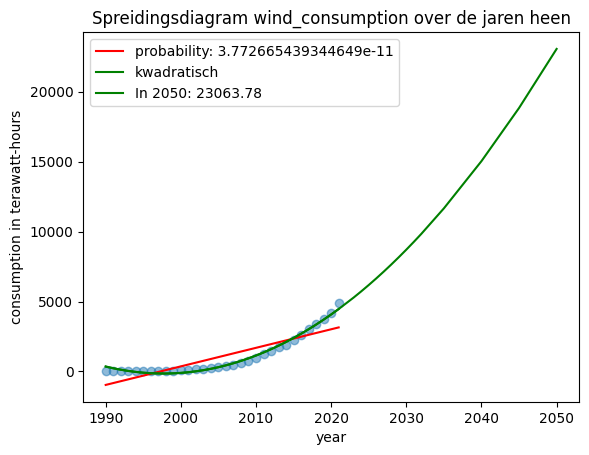

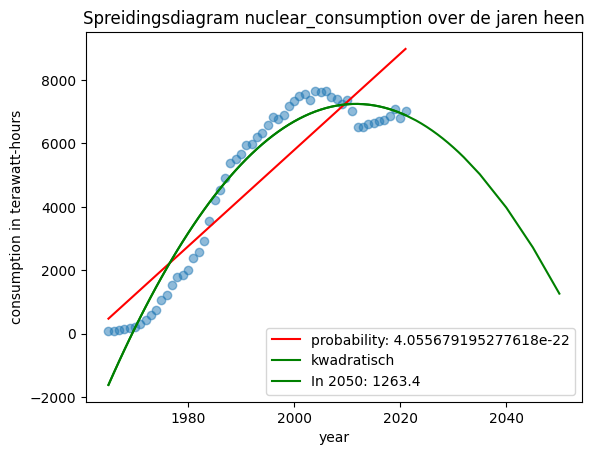

In [ ]:
#we breiden de kwadratische trend uit richting 2050
from scipy import stats
from scipy import optimize
bronnen = ['biofuel_consumption', 'hydro_consumption', 'solar_consumption', 'wind_consumption', 'nuclear_consumption']

#Scatter chart
for bron in bronnen:
  temp = df_energy[~df_energy[bron].isna()]
  temp = temp[~(temp[bron] < 10)]
  temp = temp[temp['country'] == 'World']
  fig, ax = plt.subplots()
  x = temp['year']
  y = temp[bron]
  ax.set_xlabel('year')
  ax.set_ylabel("consumption in terawatt-hours")
  ax.set_title('Spreidingsdiagram ' + bron + ' over de jaren heen')
  plt.scatter(x, y, alpha=0.5)

  #we tekenen een lineaire regressielijn
  slope, intercept, r, p, std_err = stats.linregress(x, y)
  def myfunc(x):
    return slope * x + intercept
  mymodel = list(map(myfunc, x))
  plt.plot(x, mymodel, c='r', label = 'probability: ' + str(p))
  plt.legend()

  #en een kwadratisch verband
  def parabola(x, a, b, c):
    return a*x**2 + b*x + c
  fit_params, pcov = optimize.curve_fit(parabola, x, y)  
  y_fit = parabola(x, *fit_params)
  plt.plot(x, y_fit, label='kwadratisch', color = 'green')
  x_extend = x.append(pd.Series([2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2035,2040,2045,2050]))
  plt.plot(x_extend, fit_params[0]*x_extend**2 + fit_params[1]*x_extend + fit_params[2],color='green', label = 'In 2050: ' + str(round(fit_params[0]*(2050)**2 + fit_params[1]*(2050) + fit_params[2],2)))
  plt.legend()

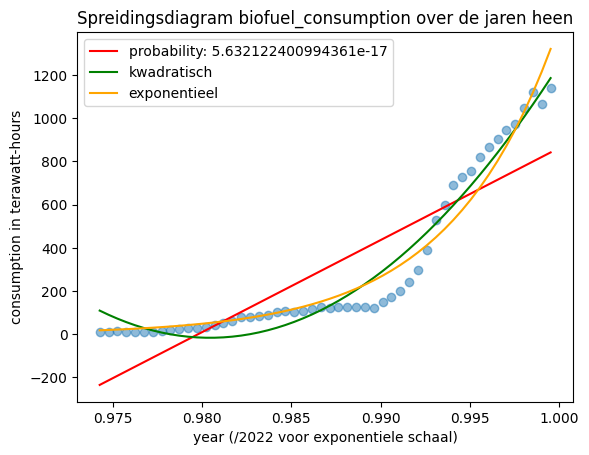

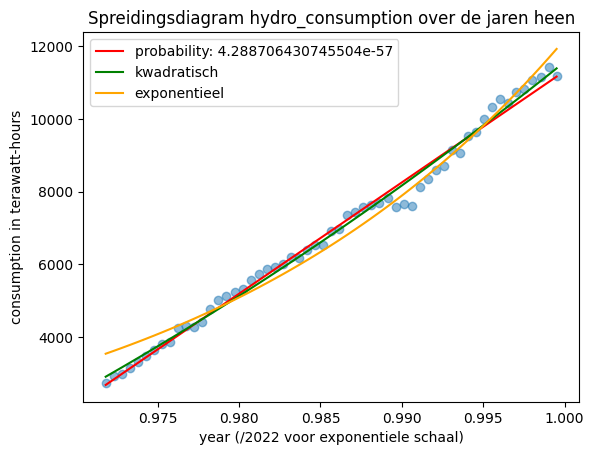

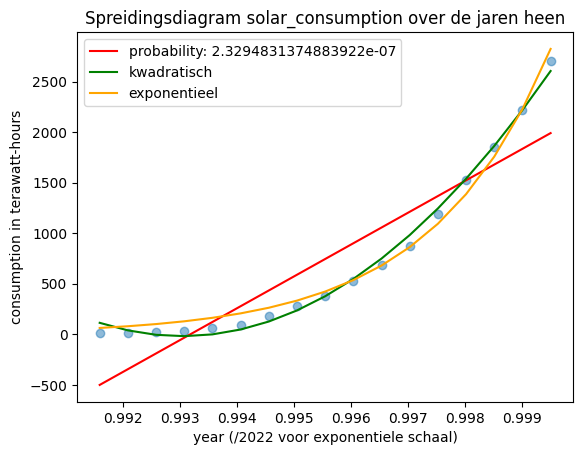

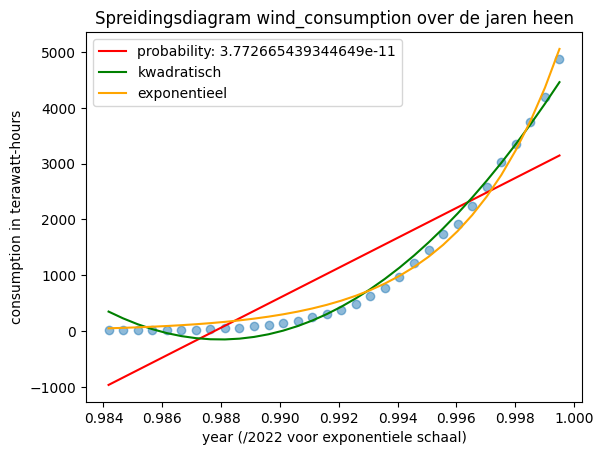

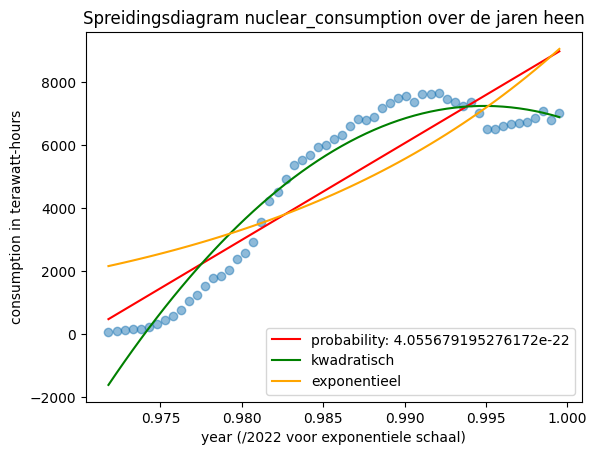

In [ ]:
#Exponentieel verband erbij in
from scipy import stats
from scipy import optimize
bronnen = ['biofuel_consumption', 'hydro_consumption', 'solar_consumption', 'wind_consumption', 'nuclear_consumption']

#Scatter chart
for bron in bronnen:
  temp = df_energy[~df_energy[bron].isna()]
  temp = temp[~(temp[bron] < 10)]
  temp = temp[temp['country'] == 'World']
  fig, ax = plt.subplots()
  x = temp['year']/2022
  y = temp[bron]
  ax.set_xlabel('year (/2022 voor exponentiele schaal)')
  ax.set_ylabel("consumption in terawatt-hours")
  ax.set_title('Spreidingsdiagram ' + bron + ' over de jaren heen')
  plt.scatter(x, y, alpha=0.5)

  #we tekenen een lineaire regressielijn
  slope, intercept, r, p, std_err = stats.linregress(x, y)
  def myfunc(x):
    return slope * x + intercept
  mymodel = list(map(myfunc, x))
  plt.plot(x, mymodel, c='r', label = 'probability: ' + str(p))
  plt.legend()

  #en een kwadratisch verband
  def parabola(x, a, b, c):
    return a*x**2 + b*x + c
  fit_params, pcov = optimize.curve_fit(parabola, x, y)  
  y_fit = parabola(x, *fit_params)
  plt.plot(x, y_fit, label='kwadratisch', color = 'green')
  

  #nu ook exponentieel proberen
  def myExpFunc(x, a, b):
      return a * np.power(x, b)
  popt, pcov = optimize.curve_fit(myExpFunc, x, y)
  plt.plot(x, myExpFunc(x, *popt), label= 'exponentieel', color = 'orange')
  plt.legend()

<ipython-input-62-957367d5df8c>:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_extend = (temp['year'].append(pd.Series([2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2035,2040,2045,2050])))/expfactor
<ipython-input-62-957367d5df8c>:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_extend = (temp['year'].append(pd.Series([2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2035,2040,2045,2050])))/expfactor
<ipython-input-62-957367d5df8c>:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_extend = (temp['year'].append(pd.Series([2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2035,2040,2045,2050])))/expfactor
<ipython-input-62-957367d5df8c>:36: FutureWarning: The series.append method is deprecated and will be r

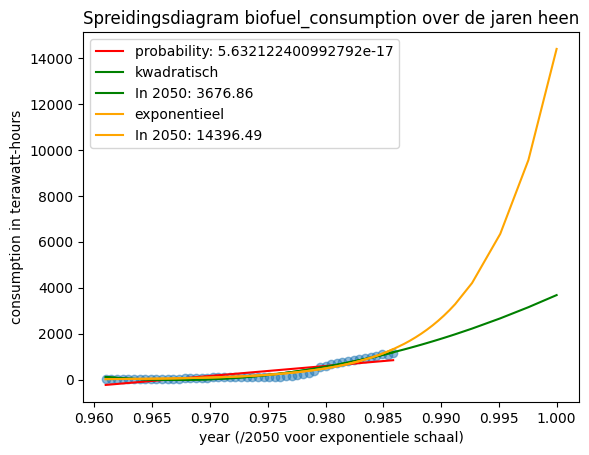

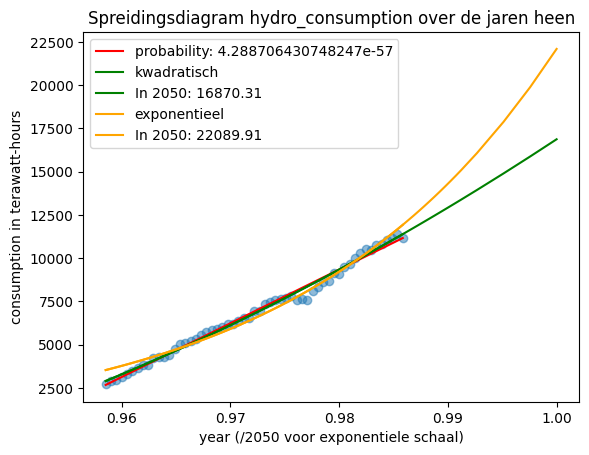

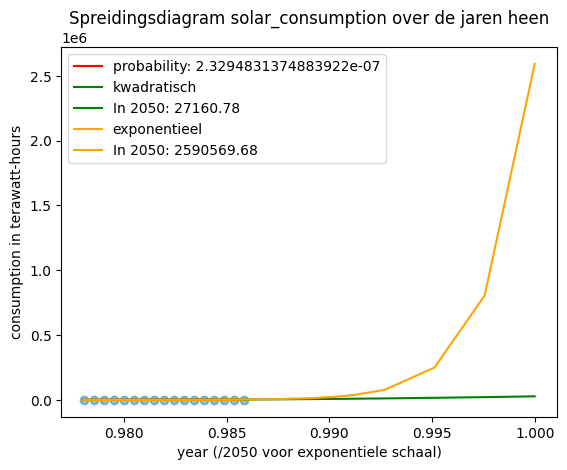

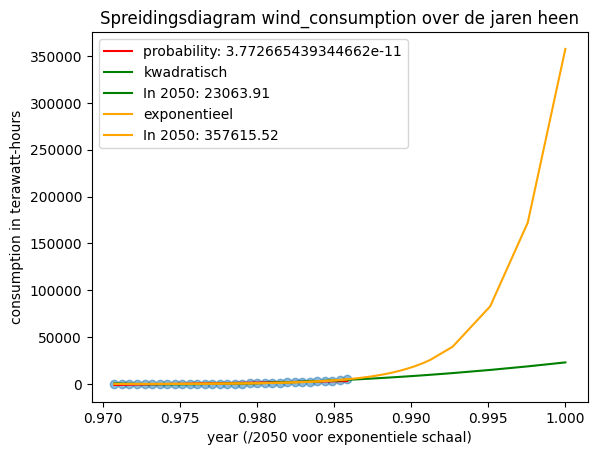

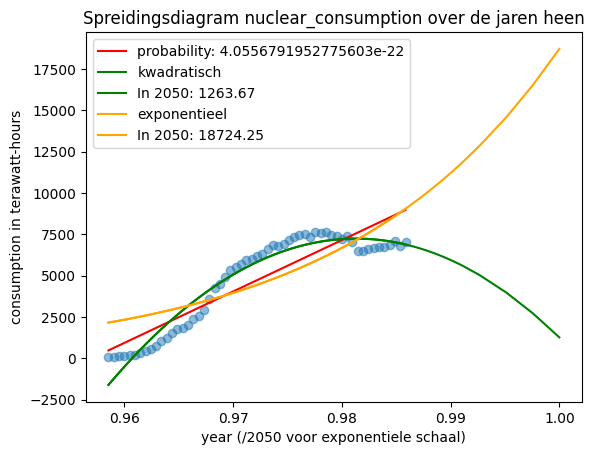

In [ ]:
#we breiden de ook de exponentiele trend uit richting 2050
from scipy import stats
from scipy import optimize
bronnen = ['biofuel_consumption', 'hydro_consumption', 'solar_consumption', 'wind_consumption', 'nuclear_consumption']

#Scatter chart
for bron in bronnen:
  temp = df_energy[~df_energy[bron].isna()]
  temp = temp[~(temp[bron] < 10)]
  temp = temp[temp['country'] == 'World']
  fig, ax = plt.subplots()
  expfactor = 2050 #1 #2050 voor exponentiele schaal erbij
  x = temp['year']/expfactor
  y = temp[bron]
  ax.set_xlabel('year (/2050 voor exponentiele schaal)')
  # ax.set_xlabel('year')
  ax.set_ylabel("consumption in terawatt-hours")
  ax.set_title('Spreidingsdiagram ' + bron + ' over de jaren heen')
  plt.scatter(x, y, alpha=0.5)

  #we tekenen een lineaire regressielijn
  slope, intercept, r, p, std_err = stats.linregress(x, y)
  def myfunc(x):
    return slope * x + intercept
  mymodel = list(map(myfunc, x))
  plt.plot(x, mymodel, c='r', label = 'probability: ' + str(p))
  plt.legend()

  #en een kwadratisch verband
  def parabola(x, a, b, c):
    return a*x**2 + b*x + c
  fit_params, pcov = optimize.curve_fit(parabola, x, y)  
  y_fit = parabola(x, *fit_params)
  plt.plot(x, y_fit, label='kwadratisch', color = 'green')

  x_extend = (temp['year'].append(pd.Series([2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2035,2040,2045,2050])))/expfactor
  plt.plot(x_extend, fit_params[0]*x_extend**2 + fit_params[1]*x_extend + fit_params[2],color='green', label = 'In 2050: ' + str(round(fit_params[0]*(2050/expfactor)**2 + fit_params[1]*(2050/expfactor) + fit_params[2],2)))

  #nu ook exponentieel proberen
  def myExpFunc(x, a, b):
      return a * np.power(x, b)
  popt, pcov = optimize.curve_fit(myExpFunc, x, y)
  plt.plot(x, myExpFunc(x, *popt), label= 'exponentieel', color = 'orange')

  plt.plot(x_extend,popt[0]*np.power(x_extend,popt[1]),color='orange', label = 'In 2050: ' +str(round(popt[0]*np.power(2050/expfactor,popt[1]),2)))
  plt.legend()

In [ ]:
# correlatiecoefficienten:
for bron in bronnen:
  y = df_energy[~df_energy[bron].isna()]
  y = y[~(y[bron] < 10)]
  y = y[y['country'] == 'World']
  print(bron)
  r = np.corrcoef(y['year'], y[bron])
  display(r)

biofuel_consumption


array([[1.       , 0.8700265],
       [0.8700265, 1.       ]])

hydro_consumption


array([[1.        , 0.99515273],
       [0.99515273, 1.        ]])

solar_consumption


array([[1.        , 0.91660548],
       [0.91660548, 1.        ]])

wind_consumption


array([[1.        , 0.87872214],
       [0.87872214, 1.        ]])

nuclear_consumption


array([[1.        , 0.90539872],
       [0.90539872, 1.        ]])

#Kosten

In [ ]:
df_energy_costs.columns

Index(['Entity', 'Code', 'Year', 'Bioenergy levelized cost of energy',
       'Geothermal levelized cost of energy',
       'Offshore wind levelized cost of energy',
       'Solar photovoltaic levelized cost of energy',
       'Concentrated solar power levelized cost of energy',
       'Hydropower levelized cost of energy',
       'Onshore wind levelized cost of energy'],
      dtype='object')

In [ ]:
#Solar photovoltaic levelized cost of energy en Concentrated solar power levelized cost of energy
#Offshore wind levelized cost of energy en Onshore wind levelized cost of energy
#We willen het totaal aan zonne-energie en windenergie, dus deze waarden tellen we op
df_energy_costs['total_solar'] = df_energy_costs['Solar photovoltaic levelized cost of energy'] + df_energy_costs['Concentrated solar power levelized cost of energy']
df_energy_costs['total_wind'] = df_energy_costs['Offshore wind levelized cost of energy'] + df_energy_costs['Onshore wind levelized cost of energy']

In [ ]:
df_energy_costs['Entity'].unique()

array(['Australia', 'Brazil', 'Canada', 'China', 'Denmark', 'France',
       'Germany', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands',
       'South Korea', 'Spain', 'Sweden', 'Turkey', 'Ukraine',
       'United Kingdom', 'United States', 'Vietnam', 'World'],
      dtype=object)

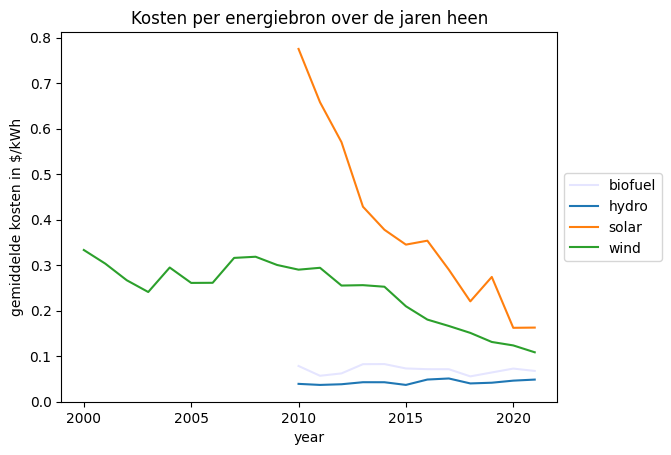

In [ ]:
#Lineplot per jaar, wereld
fig, ax = plt.subplots()
temp = df_energy_costs[df_energy_costs['Entity'] == 'World'] 
temp = temp.sort_values(by='Year')
x = temp['Year']
y1 = temp['Bioenergy levelized cost of energy']
y2 = temp['Hydropower levelized cost of energy']
y3 = temp['total_solar']
y4 = temp['total_wind']

ax.set_xlabel('year')
ax.set_ylabel('gemiddelde kosten in $/kWh')
ax.set_title('Kosten per energiebron over de jaren heen')
ax.plot(x, y1, label = 'biofuel',color='blue',alpha=0.1)
ax.plot(x, y2, label = 'hydro')
ax.plot(x, y3, label = 'solar')
ax.plot(x, y4, label = 'wind')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

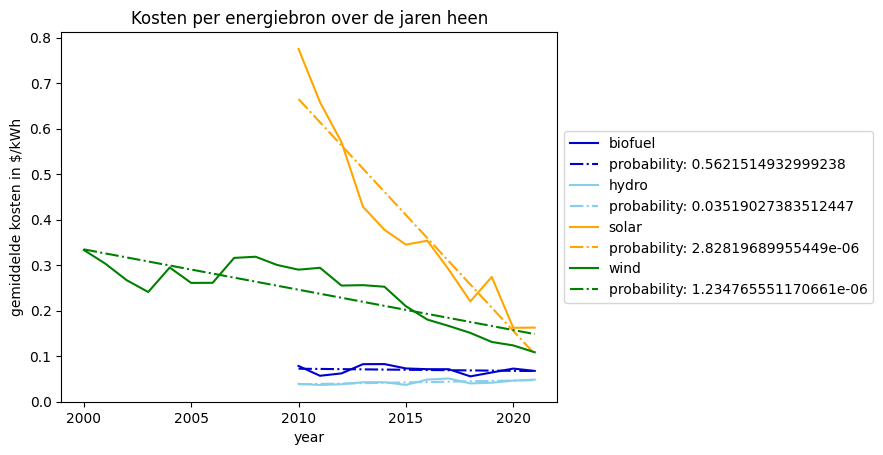

In [92]:
#Lineplot per jaar, wereld
fig, ax = plt.subplots()
temp = df_energy_costs[df_energy_costs['Entity'] == 'World'] 
temp = temp.sort_values(by='Year')
x = temp['Year']
y1 = temp['Bioenergy levelized cost of energy']
y2 = temp['Hydropower levelized cost of energy']
y3 = temp['total_solar']
y4 = temp['total_wind']

#we tekenen ook een lineaire regressielijn per bron
def myfunc(x):
  return slope * x + intercept

ax.set_xlabel('year')
ax.set_ylabel('gemiddelde kosten in $/kWh')
ax.set_title('Kosten per energiebron over de jaren heen')

ax.plot(x, y1, label = 'biofuel',color='MediumBlue')
temp1 = temp[~temp['Bioenergy levelized cost of energy'].isna()]
x1 = temp1['Year']
temp1 = temp1['Bioenergy levelized cost of energy']
slope, intercept, r, p, std_err = stats.linregress(x1, temp1)
mymodel = list(map(myfunc, x1))
plt.plot(x1, mymodel, linestyle = 'dashdot', color = 'MediumBlue', label = 'probability: ' + str(p))

ax.plot(x, y2, label = 'hydro', color = 'SkyBlue')
temp2 = temp[~temp['Hydropower levelized cost of energy'].isna()]
x2 = temp2['Year']
temp2 = temp2['Hydropower levelized cost of energy']
slope, intercept, r, p, std_err = stats.linregress(x2, temp2)
mymodel = list(map(myfunc, x2))
plt.plot(x2, mymodel, linestyle = 'dashdot', color = 'SkyBlue', label = 'probability: ' + str(p))

ax.plot(x, y3, label = 'solar', color = 'orange')
temp3 = temp[~temp['total_solar'].isna()]
x3 = temp3['Year']
temp3 = temp3['total_solar']
slope, intercept, r, p, std_err = stats.linregress(x3, temp3)
mymodel = list(map(myfunc, x3))
plt.plot(x3, mymodel, linestyle = 'dashdot', color = 'orange', label = 'probability: ' + str(p))

ax.plot(x, y4, label = 'wind', color = 'green')
temp4 = temp[~temp['total_wind'].isna()]
x4 = temp4['Year']
temp4 = temp4['total_wind']
slope, intercept, r, p, std_err = stats.linregress(x4, temp4)
mymodel = list(map(myfunc, x4))
plt.plot(x4, mymodel, linestyle = 'dashdot', color = 'green', label = 'probability: ' + str(p))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [94]:
# correlatiecoefficienten:
temp = df_energy_costs[df_energy_costs['Entity'] == 'World'] 
y1 = temp[~temp['Bioenergy levelized cost of energy'].isna()]
x1 = y1['Year']
y1 = y1['Bioenergy levelized cost of energy']

y2 = temp[~temp['Hydropower levelized cost of energy'].isna()]
x2 = y2['Year']
y2 = y2['Hydropower levelized cost of energy']

y3 = temp[~temp['total_solar'].isna()]
x3 = y3['Year']
y3 = y3['total_solar']

y4 = temp[~temp['total_wind'].isna()]
x4 = y4['Year']
y4 = y4['total_wind']

print('biofuel')
r = np.corrcoef(x1,y1)
display(r)

print('hydro')
r = np.corrcoef(x2,y2)
display(r)

print('solar')
r = np.corrcoef(x3,y3)
display(r)

print('wind')
r = np.corrcoef(x4,y4)
display(r)

biofuel


array([[ 1.        , -0.18627224],
       [-0.18627224,  1.        ]])

hydro


array([[1.        , 0.60999115],
       [0.60999115, 1.        ]])

solar


array([[ 1.        , -0.94767576],
       [-0.94767576,  1.        ]])

wind


array([[ 1.        , -0.83645574],
       [-0.83645574,  1.        ]])